In [1]:
##load packages

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [4]:
from keras.models import Sequential
from keras.layers import Input,Dense,Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import Adam,SGD,RMSprop

In [5]:
directory = 'C:\\Users\\hp\\Downloads\\'

In [6]:
## Load in the data set 
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(directory+"diabetes (1).csv", names=names,header=0)

In [7]:
diabetes_df

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
diabetes_df.shape

(768, 9)

In [9]:
x=diabetes_df.iloc[:,:-1].values
y=diabetes_df.iloc[:,-1].values

In [ ]:
# Trying random forest

In [10]:
from sklearn.model_selection import train_test_split

#split the data into test and train
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)


In [11]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=200,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(x_train,y_train)

y_pred=model_RandomForest.predict(x_test)

In [12]:
import seaborn as sns

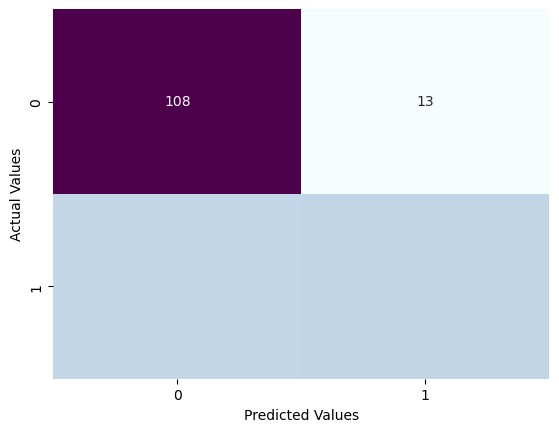

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       121
           1       0.73      0.51      0.60        71

    accuracy                           0.75       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.75      0.74       192

Accuracy of the model:  0.75


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

## Neural Network

In [14]:
#Building a neural network:
normalizer = StandardScaler()
x_train_norm = normalizer.fit_transform(x_train)
x_test_norm = normalizer.fit_transform(x_test)

### DATA HAS 8 INPUT.HENCE ,THERE WILL BE 8 INPUT NODES
HIDDEN LAYERS = 1<br>
HIDDEN NODES IN LAYER =12<br>
ACTIVATION FUNTION:SIGMOID<br>
LOSS FUNTION : BINARYCROSSENTOPY<BR><br>
OPTIMIZER: SGD<br>


### REGULARIZATION

In [15]:
model_1=Sequential()

In [16]:
model_1.add(Dense(12,input_shape=(8,),activation='sigmoid'))

In [17]:
model_1.add(Dense(1,activation='sigmoid'))

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model_1.compile(SGD(learning_rate=0.01),"binary_crossentropy",metrics=["accuracy"])

In [20]:
run_hist_1=model_1.fit(x_train_norm,y_train,validation_data=(x_test_norm,y_test),epochs=200)

Epoch 1/200


18/18 [==============================] - 1s 16ms/step - loss: 0.7228 - accuracy: 0.3559 - val_loss: 0.7030 - val_accuracy: 0.4688
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7096 - accuracy: 0.4896 - val_loss: 0.6938 - val_accuracy: 0.5469
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.6042 - val_loss: 0.6871 - val_accuracy: 0.5990
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.6406 - val_loss: 0.6822 - val_accuracy: 0.6250
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.6510 - val_loss: 0.6785 - val_accuracy: 0.6354
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.6562 - val_loss: 0.6756 - val_accuracy: 0.6354
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.6545 - val_loss: 0.6733 - val_accuracy: 0.6354
Epoch 8/20

In [21]:
y_pred_prob_nn_1=model_1.predict(x_test_norm)

6/6 [==============================] - 0s 1ms/step


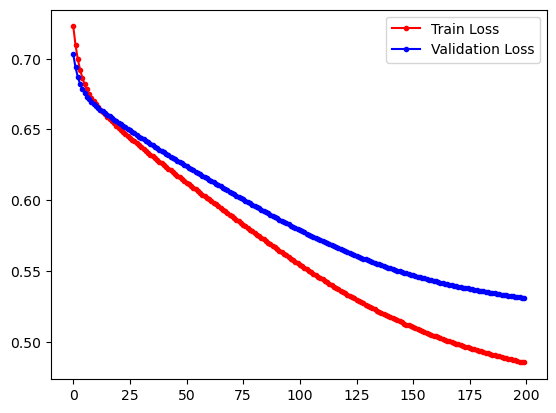

In [22]:
fig,ax=plt.subplots()
ax.plot(run_hist_1.history["loss"],'r',marker='.',label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b',marker='.',label="Validation Loss")
ax.legend()

